# Logistic Regression

Logistic regression is a classification algorithm, whose model is as follows:

$$\begin{align*}
    z & = \vec{w} \cdot \vec{x} + b \\
    f_{\vec{w},b}(\vec{x}) &= \dfrac{1}{1+e^{-z}}, \quad 0< f_{\vec{w},b}(\vec{x})<1
\end{align*}
$$
The output, $f_{\vec{w},b} (\vec{x})$ represents the probability for the input $\vec{x}$ with parameters $\vec{w},b$ is class 1. That is,
$$f_{\vec{w},b}(\vec{x}) = P(y=1|\vec{x};(\vec{w},b)) $$

- We check if $f_{\vec{w},b}(\vec{x}) \geq 0.5$, if yes then we predict, $\hat{y}=1$
else we say, $\hat{y}=0$  
- **Decision boundary equation is:** $\boxed{\vec{w}\cdot \vec{x} + b = 0}$

---
## Cost function for logistic regression
$$
\begin{align*}
    J(\vec{w},b) = \dfrac{1}{n} \left[\sum_{i=1}^{n} -y^{(i)}log(f_{\vec{w},b} (\vec{x}^{(i)})) - (1-y^{(i)})log(1-f_{\vec{w},b}(\vec{x}^{(i)})) \right]
\end{align*}
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [3]:
def cost_log_reg(X,y,w,b):
    """
    Computes cost for logistic regression
    
    Arguments:
    X : (ndarray (n,d)), Data matrix, n observation as rows and d features as rows
    y : (ndarray (n,)), Target values vector 
    w : (ndarray (d,)), Parameter, d-dimensional, one value for each feature
    b : scalar, parameter
    Outputs:
    cost : (scalar) Cost for the logistic regression model
    """
    
    n = X.shape[0]
    cost = 0.0
    
    for i in range(n):
        z_i = np.dot(X[i],w) +b
        f_wb_i = sigmoid(z_i)
        
        cost = cost + -y[i]*np.log(f_wb_i) - (1-y[i])*np.log(1-f_wb_i)
        
    cost = cost/n
    return cost

## Gradient descent for logistic regression
There not much difference in gradient descent algorithm than in previous modules except $f_{\vec{w},b}(\vec{x}) $ is different:
$$
    w_1 \leftarrow w_1 - \alpha \dfrac{1}{n}\sum_{i=1}^{n} (f_{\vec{w},b}(\vec{x}^{(i)}) - y^{(i)})(x_1^{(i)}) \\
    \vdots\\
    w_d \leftarrow w_d - \alpha \dfrac{1}{n}\sum_{i=1}^{n} (f_{\vec{w},b}(\vec{x}^{(i)}) - y^{(i)})(x_d^{(i)})
$$
and $$b \leftarrow b - \alpha \dfrac{1}{n}\sum_{i=1}^{n} (f_{\vec{w},b}(\vec{x}^{(i)}) - y^{(i)})$$

In [4]:
def pdv_logreg(X,y,w,b):
    """
    Computes the partial derivatives for gradient descent with multiple variables
    
    Arguments:
    X : (ndarray (n,d)), Data matrix, n observation as rows and d features as rows
    y : (ndarray (n,)), Target values vector 
    w : (ndarray (d,)), Parameter, d-dimensional, one value for each feature
    b : scalar, parameter
    
    Output:
    dj_dw : (ndarray(d,)), Gradient of cost function w.r.t w
    dj-db : (scalar), Partial derivative of cost function w.r.t b
    """
    
    n,d = X.shape
    dj_dw = np.zeros(d,)
    dj_db = 0
    
    for i in range(n):
        f_wb_i = sigmoid(np.dot(X[i],w)+b)
        
        for j in range(d):
            dj_dw[j] = dj_dw[j] + (f_wb_i - y[i])*X[i,j]
        dj_db = dj_db + (f_wb_i - y[i])
    
    dj_dw = dj_dw/n
    dj_db = dj_db/n
    
    return dj_dw,dj_db

In [5]:
def grad_desc_logreg(X, y, w_in, b_in, alpha, num):
    """
    Computes gradient descent for multiple regression
    
    Arguments:
    X : (ndarray (n,d)), Data matrix, n observation as rows and d features as rows
    y : (ndarray (n,)), Target values vector 
    w_in : (ndarray (d,)), Parameter, d-dimensional, one value for each feature
    b_in : scalar, parameter
    alpha : learning rate
    num : (int), number of iterations
    
    Outputs: 
    w : final value of parameter after gradient descent
    b : final value of parameter after gradient descent
    J_hist : (list), cost values list
    """
    
    J_hist = []
    w = w_in
    b = b_in
    
    for i in range(num):
        dj_dw,dj_db = pdv_logreg(X,y,w,b)
        
        w = w - alpha*dj_dw
        b = b - alpha*dj_db
    
        if i<10000:
            J_hist.append(cost_log_reg(X,y,w,b))
    
    return w,b,J_hist

### Working with example

In [6]:
# Set a random seed for reproducibility
np.random.seed(0)

# Generate 5 data points for each class
class_0 = np.random.normal(0, 1, (5, 2))  # Class 0 centered at (0,0)
class_1 = np.random.normal(2, 1, (5, 2))  # Class 1 centered at (2,2)

# Combine the data points
X = np.vstack([class_0, class_1])
y = np.hstack([np.zeros(5), np.ones(5)])  # Labels (0 for class 0, 1 for class 1)

# Shuffle the data (since we stacked class_0 first and class_1 second)
shuffle_idx = np.random.permutation(len(X))
X = X[shuffle_idx]
y = y[shuffle_idx]

In [7]:
w_in = np.random.randn(2)
b_in = 0
alpha =0.06
num = 1000
w,b, j_hist = grad_desc_logreg(X,y,w_in,b_in,alpha,num)

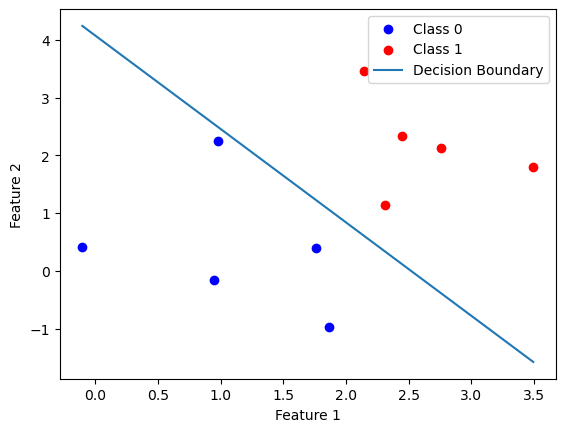

In [8]:
def plot_decision_boundary(X, y, w, b):
    # Plot the data points
    plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='blue', label='Class 0')
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='red', label='Class 1')
    
    # Define the decision boundary (in this case, a line)
    x_vals = np.array([np.min(X[:, 0]), np.max(X[:, 0])])
    y_vals = -(w[0] * x_vals + b) / w[1]
    
    # Plot the decision boundary
    plt.plot(x_vals, y_vals, label='Decision Boundary')
    
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()



# Plotting the output
plot_decision_boundary(X, y, w, b)
